In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# set random seed for reproducibility
np.random.seed(42)

# generate random data for hours studied (feature1) and test scores(Target)
n_samples=500
X1=np.random.uniform(1,10,n_samples)  # Random hours studied
noise=np.random.normal(0,5,n_samples) # Random noise           
y=10 * X1+ noise  # linear relationship with noise

In [4]:
# create a dataframe for easy manipulation
data= pd.DataFrame({'Hours_Studied':X1, 'Test_Score':y})
data.head()


,Hours_Studied,Test_Score
0,4.370861,45.417391
1,9.556429,104.945142
2,7.587945,80.631574
3,6.387926,60.994745
4,2.404168,19.549604


In [5]:
!pip install joblib

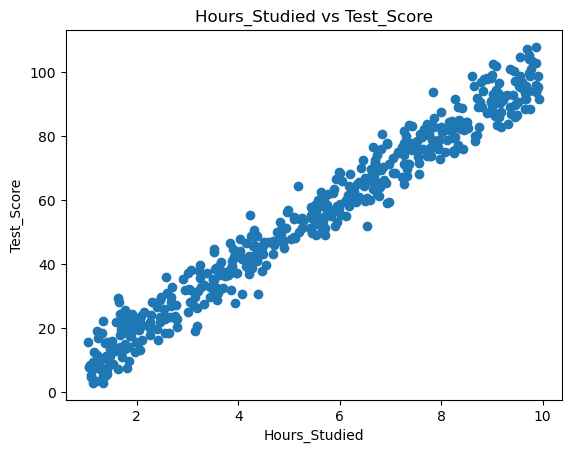

               Hours_Studied  Test_Score
Hours_Studied       1.000000    0.983399
Test_Score          0.983399    1.000000


In [6]:
# Scatter plot to visualize the relationship
plt.scatter(data['Hours_Studied'],data['Test_Score'])
plt.title('Hours_Studied vs Test_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Test_Score')
plt.show()

# check the correlation between features and target
corr_matrix =data.corr()
print(corr_matrix)

In [9]:
# split the dataset into independent variables(x) and dependentt variables(y)
x= data[['Hours_Studied']]
y=data['Test_Score']

# split the dataset into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

# scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [10]:
# Instantiate the linear regression model
model= LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# check the model's coefficients and intercept
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)



Coefficient:  [27.31629308]
Intercept:  55.31588683514129


In [11]:
# example of predicting  a single value using a new data point
new_data=np.array([[6]])  # example value for hours studied
new_data_df= pd.DataFrame(new_data, columns=['Hours_Studied'])

# scale the new data
new_data_scaled=scaler.transform(new_data_df)

# predict the test score
single_prediction= model.predict(new_data_scaled)
print(f"Predicted Test Score of 6 hours of study: {single_prediction[0]}")



Predicted Test Score of 6 hours of study: 60.03282292232381


In [12]:
# predict onj the test set
y_pred= model.predict(X_test_scaled)


# calculate Mean Squared Error (MSE) and R-squared(R2)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"mean_squared_error: {mse}")
print(f"R_squared: {r2}")


mean_squared_error: 26.105427937987933
R_squared: 0.9645671742510007


In [13]:
# save the trained model to a file
joblib.dump(model, 'linear_regression_model.pk1')
joblib.dump(scaler, 'scaler.pk1')

['scaler.pk1']

In [14]:
# load the saved model and scaler
loaded_model= joblib.load('linear_regression_model.pk1')
loaded_scaler= joblib.load('scaler.pk1')

# new data for prediction (e.g , 6 hours of study)
new_data= np.array([[6]])
new_data_df= pd.DataFrame(new_data, columns=['Hours_Studied'])

# scale the new data using the loaded scaler
new_data_scaled=loaded_scaler.transform(new_data_df)

# make the prediction using the loaded model
single_prediction= loaded_model.predict(new_data_scaled)

# output the predicted test score
print(f"Predicted Test Score of 6 hours of study: {single_prediction[0]}")





Predicted Test Score of 6 hours of study: 60.03282292232381
